# Нейронные сети. Архитектуры нейронных сетей

## Подготовка данных

Создание в Keras  сравнение классификаторов  на наборе Fashion-MNIST: 
1.   простейший перцептрон(однослойная нейросеть),
2.   полносвязная нейросетка
2.   сверточная нейросетка








In [ ]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#  загрузка через стандартный загрузчиk керас
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
# расшифровка, что в каком классе храниться
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_x=(train_x/255).reshape(-1,784) # перенесли значения в интервал [о,1],  и преобразовали в плоскую форму
test_x=(test_x/255).reshape(-1,784)#  тоже самое
num_output=10
y_train_one_hot=tf.keras.utils.to_categorical(train_y, num_output)# представление  результатат в виде вектора признаков класов
y_test_one_hot=tf.keras.utils.to_categorical(test_y, num_output)#тоже самое




4431872/4422102 [==============================] - 0s 0us/step


# **Полносвязная нейросетка**

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7486 - accuracy: 0.7354 - val_loss: 0.4599 - val_accuracy: 0.8344
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5233 - accuracy: 0.8176 - val_loss: 0.4146 - val_accuracy: 0.8474
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4749 - accuracy: 0.8330 - val_loss: 0.3820 - val_accuracy: 0.8617
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4463 - accuracy: 0.8432 - val_loss: 0.3877 - val_accuracy: 0.8605
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4337 - accuracy: 0.8464 - val_loss: 0.3636 - val_accuracy: 0.8665
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4148 - accuracy: 0.8525 - val_loss: 0.3604 - val_accuracy: 0.8692
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4048 - accuracy: 0.8552 - val_loss: 0.3568 - val_accuracy:

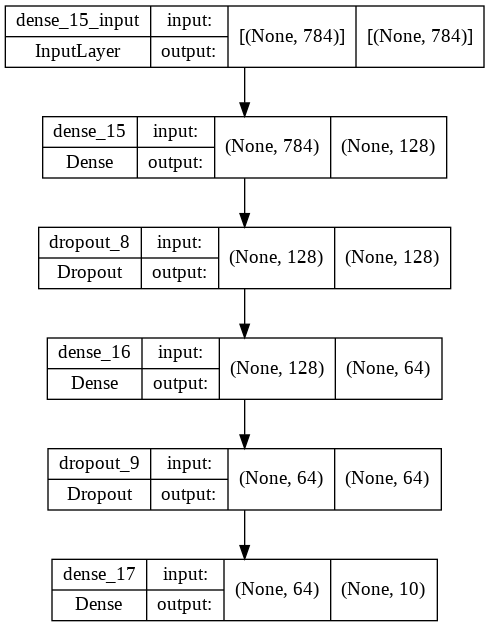

In [ ]:

import matplotlib.pyplot as plt


"""Вариант загрузки с google drive своего родного
from google.colab import drive 
drive.mount('/content/drive')# смонтировали гугл диск
#грузим данные из гугл диска
# очень медленно train_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_train.csv", delimiter=',')
# очень медленно test_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_test.csv", delimiter=',')
#train_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_train.csv")
test_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_test.csv")
#  входные данные готовим, нормализуем значения
x_train=np.array(train_ds.iloc[:,1:])/255
x_test=np.array(test_ds.iloc[:,1:])/255
y_train=np.array(train_ds.iloc[:, 0])
y_test=np.array(test_ds.iloc[:, 0])
print(x_train.shape, y_test.shape)
"""




# делаем классификатор на основе полносвязный нейросети
model_MPL = tf.keras.models.Sequential()
model_MPL.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(784, ))) # добавляем слои
model_MPL.add(tf.keras.layers.Dropout(0.3))
#model_MPL.add(tf.keras.layers.BatchNormalization())# Batch нормализация, в данном случае абсолютно бессмыcленно ее применение
model_MPL.add(tf.keras.layers.Dense(64, activation='relu'))
model_MPL.add(tf.keras.layers.Dropout(0.5))
model_MPL.add(tf.keras.layers.Dense(num_output, activation='softmax'))# 
my_Opt = tf.keras.optimizers.Adam(learning_rate=0.0011, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_MPL.compile(optimizer=my_Opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history_MPL=model_MPL.fit(train_x, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)
eva=model_MPL.evaluate(test_x, y_test_one_hot)
print(model_MPL.summary(), 'аccuracy:',eva[1]) 
# красиво 
tf.keras.utils.plot_model(model_MPL, show_shapes=True)





# **Анализ полносвязной  нейросети**

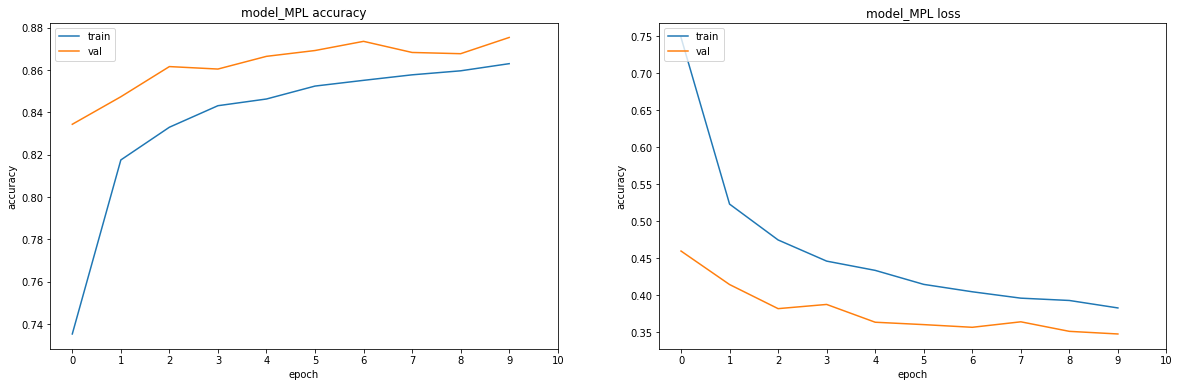

In [ ]:
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_MPL.history['accuracy'])
ax.plot(history_MPL.history['val_accuracy'])
ax.set_title('model_MPL accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,11))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_MPL.history['loss'])
ax2.plot(history_MPL.history['val_loss'])
ax2.set_title('model_MPL loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,11))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8688 - accuracy: 0.7263 - val_loss: 0.6560 - val_accuracy: 0.7879
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6160 - accuracy: 0.8007 - val_loss: 0.5819 - val_accuracy: 0.8067
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5614 - accuracy: 0.8160 - val_loss: 0.5446 - val_accuracy: 0.8198
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5318 - accuracy: 0.8240 - val_loss: 0.5235 - val_accuracy: 0.8267
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5123 - accuracy: 0.8292 - val_loss: 0.5090 - val_accuracy: 0.8272
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4984 - accuracy: 0.8338 - val_loss: 0.5028 - val_accuracy: 0.8284
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4874 - accuracy: 0.8364 - val_loss: 0.4911 - val_accuracy:

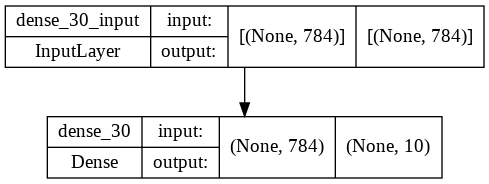

In [ ]:
# простейший логистический регрессор, это просто 1 слойная нейросеть

number_of_classes = 10# количество классов  на выходе
number_of_features = 784 #количество входных параметров- длина 
model_log = tf.keras.models.Sequential()
model_log.add(tf.keras.layers.Dense(number_of_classes, activation = 'softmax', input_dim = number_of_features))
model_log.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history_log=model_log.fit(train_x, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)
eva_1=model_log.evaluate(test_x, y_test_one_hot)
print(model_log.summary(), 'аccuracy:',eva_1[1]) 
tf.keras.utils.plot_model(model_log, show_shapes=True)


# **Анализ логистического регрессора**

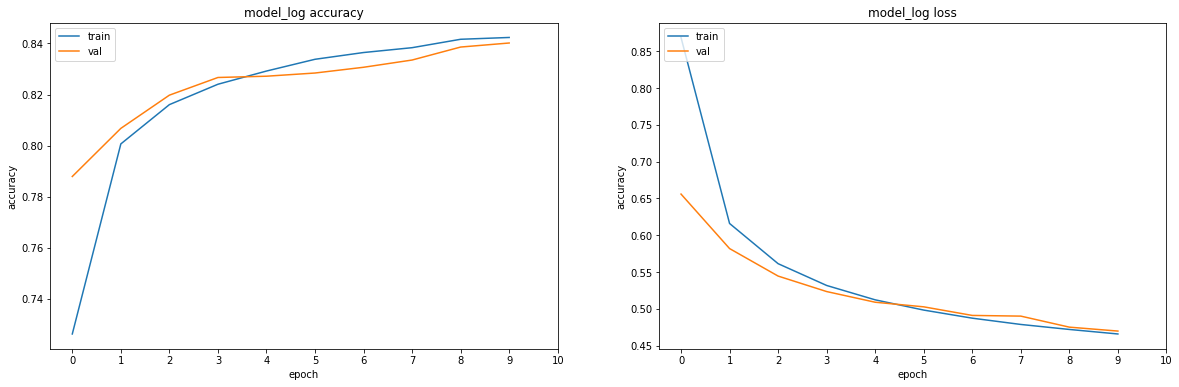

In [ ]:
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_log.history['accuracy'])
ax.plot(history_log.history['val_accuracy'])
ax.set_title('model_log accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,11))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_log.history['loss'])
ax2.plot(history_log.history['val_loss'])
ax2.set_title('model_log loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,11))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

# **Сверточная нейросетка**




In [ ]:
# сверточная нейронка
# исходники для сверточной сети, меняем форму входных данных
x_test_cnn=test_x.reshape(-1,28,28,1)
x_train_cnn=train_x.reshape(-1,28,28,1)


model_cnn = tf.keras.models.Sequential(name='model_cnn')
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1 )))# 1й сверточный
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))# 1е понижение масштаба
#model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))# 2е понижение масштаба точность падает, 
model_cnn.add(tf.keras.layers.BatchNormalization())# Batch нормализация

model_cnn.add(tf.keras.layers.Flatten())# преобразования в одномерный из 2мерного
model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(num_output, activation='softmax'))#  выходной слой

#myOpt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)# вариант стахостического градиентный спуска, с оптимизицией Нестерова
my_Opt_cnn = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_cnn.compile(loss='categorical_crossentropy', 
optimizer=my_Opt_cnn,    metrics=['accuracy'] )  

#поработаем с  earlystopping  и learning rate, т.е оптимизируем обучение
# from tensorflow.keras.callbacks import  LearningRateSheduller

from tensorflow.keras.callbacks import  EarlyStopping, LearningRateScheduler
 # пилим функцию, от количества эпох  изменяет скорость обучения
def sheduler(learning_rate, epoch):
    lr=learning_rate
    if lr<=4:learning_rate=1e-3
    elif lr<10 and lr>4 : learning_rate=1e-5
    else: learning_rate=1e-6
    return learning_rate
callback=LearningRateScheduler(sheduler)# создали диспетчер  с функцией изменения скорости обучения в зависимости от эпохи
# посмотрим, что вышло

history_cnn=model_cnn.fit(x_train_cnn, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2, callbacks=[callback])

# явно престает обучаться после 15 эпохи, нужно быструю остановку прописать
eva_cnn=model_cnn.evaluate(x_test_cnn, y_test_one_hot)




print(model_cnn.summary(), 'аccuracy:',eva_cnn[1]) 
tf.keras.utils.plot_model(model_cnn, show_shapes=True, )# схема нейросети

### *Анализ сверточной сети*

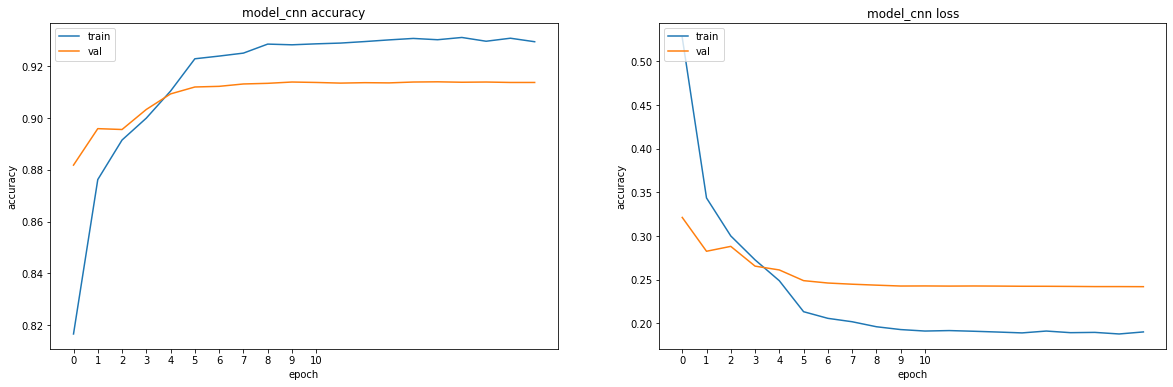

In [ ]:
from pandas.core.frame import DataFrame
#print(history_cnn.history)
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_cnn.history['accuracy'])
ax.plot(history_cnn.history['val_accuracy'])
ax.set_title('model_cnn accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,11))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_cnn.history['loss'])
ax2.plot(history_cnn.history['val_loss'])
ax2.set_title('model_cnn loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,11))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

#eva_cnn=model_cnn.evaluate(x_test_cnn, y_test_one_hot)
# print(eva_cnn)

# **Выводы**


1. Самая точная сверточная. Точность (90%). В сверточной SGD оптимизация лучше, чем Адам, для данной архитектуры и количества эпох. Очень быстро обучается и начинает  переобучаться.Это явно видно при сравнении значений loss  функций на обучающей и валидационной выборке.
2. В полносвязной нейросетке, батч нормализация эффективнее чем дропаут.
3. Однослойная нейросетсетка самая малая точность(83%).
4. Графики построены для обучающей выборки и для валидационной на каждой эпохе.

> Блок с отступами

